# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [955]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

2.11.0
[]


## **Import data**

In [956]:
df_orig = pandas.read_csv('Chefbot_Dataset - All (1).csv', encoding='utf-8')

In [957]:
# Display the first 5 rows of the dataframe
display(df_orig.head(n=5))
# Display the last 5 rows of the dataframe
display(df_orig.tail(n=5))

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


,Text,Mainclass,Subclass
571,เมนูที่เอาเส้นพาสต้ามาผัดกับของทะเลแล้วแล้วก็ใ...,สปาเกตตี,สปาเก็ตตี้ทะเล
572,สปาเก็ตตี้ที่มีสีแดง และเขียวตัดกับ สีของเส้นท...,สปาเกตตี,สปาเก็ตตี้ทะเล
573,ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อ หมู ไก...,สปาเกตตี,สปาเก็ตตี้ทะเล
574,สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลั...,สปาเกตตี,สปาเก็ตตี้ทะเล
575,สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้าน มีกุ้ง มีหมึ...,สปาเกตตี,สปาเก็ตตี้ทะเล


# **Data Preprocessing**

In [958]:
df_prepro = df_orig.copy()

## **Data Cleaning**

In [959]:
display(df_prepro.describe())
display(df_prepro.Mainclass.unique())
display(df_prepro.Subclass.unique())

,Text,Mainclass,Subclass
count,576,576,576
unique,576,3,12
top,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
freq,1,192,48


array(['พิซซ่า', 'ก๋วยเตี๋ยว', 'สปาเกตตี'], dtype=object)

array(['ค็อกเทลกุ้ง', 'มีทเดอลุกซ์', 'เห็ดและมะเขือเทศ', 'ดิปเปอร์',
       'ก๋วยเตี๋ยวน้ำตก', 'ก๋วยเตี๋ยวต้มยำน้ำใส', 'บะหมีหมูแดงหมูกรอบ',
       'เกาเหลา', 'สปาเก็ตตี้มีทบอล', 'สปาเก็ตตี้คาโบนาร่า',
       'สปาเก็ตตี้ผัก', 'สปาเก็ตตี้ทะเล'], dtype=object)

### **Remove Duplications in text inputs**

In [960]:
# display all text that appears more than once
display(df_prepro[df_prepro.duplicated('Text', keep=False)].sort_values('Text'))
# Then no duplicates

,Text,Mainclass,Subclass


### **Incorrect Word**

In [961]:
# corrections_word = {'สปาเก็ตตี้': 'สปาเกตตี'}

# df_prepro['Text'] = df_prepro['Text'].replace(corrections_word)

### **Remove unwanted character**

#### **Front-Back white space**

In [962]:
def strip_space(text):
    return text.strip()

df_prepro['Text'] = df_prepro['Text'].apply(strip_space)
df_prepro['Mainclass'] = df_prepro['Mainclass'].apply(strip_space)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove white space between words**

In [963]:
def remove_whitespace(text):
    return text.replace(" ", "")

df_prepro['Text'] = df_prepro['Text'].apply(remove_whitespace)
df_prepro['Mainclass'] = df_prepro['Mainclass'].apply(remove_whitespace)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆกับน้ำสลัดเทาซันไอส...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมๆสามารถแบ่งเป็นชิ้นได้กินกั...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove special character and punctuation**

In [964]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
thai_punctuation = 'ๆ'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation + thai_punctuation))
 
df_prepro['Text'] = df_prepro['Text'].apply(remove_punctuation)
df_prepro['Mainclass'] = df_prepro['Mainclass'].apply(remove_punctuation)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,ค็อกเทลกุ้ง


### **Label Mapping**

In [965]:
def get_label_map(df, col_name):
    label_map = {}
    for i, label in enumerate(df[col_name].unique()):
        label_map[label] = i
    reversed_label_map = {v: k for k, v in label_map.items()}
    return label_map, reversed_label_map

#### **Get main class labels**

#### **Get sub class labels**

In [966]:
subclass_label_map, reversed_subclass_label_map = get_label_map(df_prepro, 'Subclass')

display(subclass_label_map)

df_prepro['Subclass'] = df_prepro['Subclass'].map(subclass_label_map)

display(df_prepro.head())

{'ค็อกเทลกุ้ง': 0,
 'มีทเดอลุกซ์': 1,
 'เห็ดและมะเขือเทศ': 2,
 'ดิปเปอร์': 3,
 'ก๋วยเตี๋ยวน้ำตก': 4,
 'ก๋วยเตี๋ยวต้มยำน้ำใส': 5,
 'บะหมีหมูแดงหมูกรอบ': 6,
 'เกาเหลา': 7,
 'สปาเก็ตตี้มีทบอล': 8,
 'สปาเก็ตตี้คาโบนาร่า': 9,
 'สปาเก็ตตี้ผัก': 10,
 'สปาเก็ตตี้ทะเล': 11}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,0
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,0
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,0
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,0
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,0


## **Data Visualization**

In [967]:
import matplotlib.pyplot as plt
import seaborn as sns

In [968]:
def plot_sentence_length_distribution(df, col_name):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (12, 8)
    
    bin_size = 5
    bins = np.arange(0, 100, bin_size)
    plt.hist(df[col_name].str.len(), bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='train')
    xticks = np.arange(0, 150, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, 100, bin_size)
    plt.yticks(yticks, yticks)
    plt.title('Sentence Length Distribution')
    plt.legend(loc='upper right')
    plt.xlabel('Sentence Length')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name].str.len(), bins=bins)[0]):
        plt.text(a + 2.5, b + 2.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

### **Plotting the length of the text data**

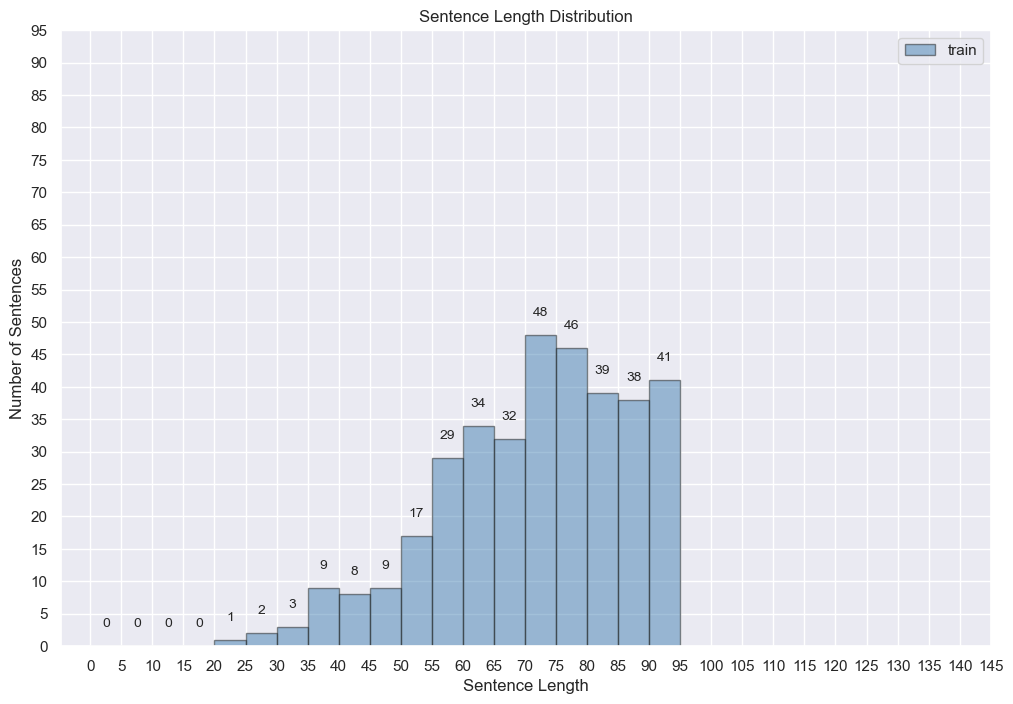

In [969]:
plot_sentence_length_distribution(df_prepro, 'Text')

#### **Maximum length of text inputs**

In [970]:
print('Max sentence length: %d' % df_prepro['Text'].str.len().max())

df_prepro['Text'].str.len().describe()

Max sentence length: 165


count    576.000000
mean      88.333333
std       26.587477
min       20.000000
25%       69.750000
50%       86.000000
75%      107.000000
max      165.000000
Name: Text, dtype: float64

### **Plot the distribution of labels**

In [971]:
def plot_label_distribution(df, col_name, title):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (6, 4)
    
    bin_size = 1
    bins = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.hist(df[col_name], bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='data')
    xticks = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, df[col_name].value_counts().max() + 100, 500)
    plt.yticks(yticks, yticks)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xlabel('Object')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name], bins=bins)[0]):
        plt.text(a + 0.5, b + 0.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

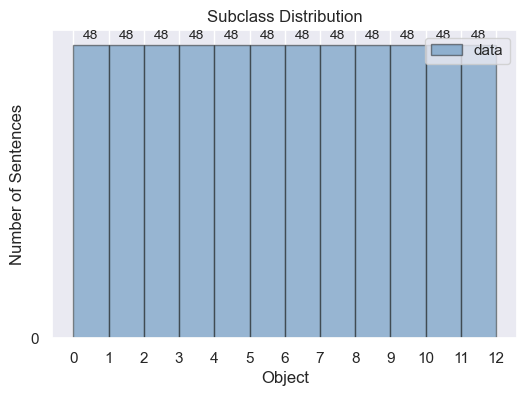

In [972]:
plot_label_distribution(df_prepro, 'Subclass', 'Subclass Distribution')

# **Keras Preprocessing**

In [973]:
df_keras = df_prepro.copy()

In [974]:
df_keras = df_keras.to_numpy()
df_keras

array([['อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์แลนด์ที่มีความเข้มข้นหอมแป้งเยอะ',
        'พิซซ่า', 0],
       ['ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามสามารถหยิบกินได้เป็นชิ้นเน้นเนื้อที่มาจากทะเล',
        'พิซซ่า', 0],
       ['ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ชื่นชอบอาหารทะเลราคาไม่แพงหาซื้อได้ง่าย',
        'พิซซ่า', 0],
       ...,
       ['ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อหมูไก่แล้วช่วยแนะนำเมนูให้ฉันหน่อย',
        'สปาเกตตี', 11],
       ['สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์', 'สปาเกตตี',
        11],
       ['สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้านมีกุ้งมีหมึกมีหอยและยังใส่พวกพริกไทยอ่อน',
        'สปาเกตตี', 11]], dtype=object)

## **Word Tokenization**

In [975]:
import pythainlp
from pythainlp import word_tokenize
from keras.utils import pad_sequences

In [976]:
input_tokenize = df_keras.copy()
for i, sentence in enumerate(input_tokenize[:, 0]):
    input_tokenize[i, 0] = np.array(word_tokenize(sentence, engine='newmm'), dtype=object)

input_tokenize = np.asarray(input_tokenize, dtype=object)

max_len = max(len(seq) for seq in input_tokenize[:, 0]) + 10

for i in range(len(input_tokenize)):
    input_tokenize[i, 0] = np.pad(input_tokenize[i, 0], (0, max_len - len(input_tokenize[i, 0])), constant_values=" ")

print("Example after padding:")
print(input_tokenize[500])

print(f"Data shape: {input_tokenize.shape}")

for seq in input_tokenize[:, 0]:
    if seq.shape[0] != 50:
        print("ไม่เท่ากับ 50")

print("เท่ากับ 50")

Example after padding:
[array(['อยาก', 'กิน', 'อะไร', 'ก็', 'ได้ที่', 'มี', 'ชีส', 'ผัก', 'เพราะ',
        'กิน', 'คีโม', 'ขอ', 'เมนู', 'ทำ', 'ง่าย', 'ใช้เวลา', 'ไม่', 'นาน',
        'มี', 'สารอาหาร', 'พวก', 'คา', 'โบ', 'ไฮ', 'เด', 'รต', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)
 'สปาเกตตี' 10]
Data shape: (576, 3)
เท่ากับ 50


In [977]:
sentence = input_tokenize[:, 0]
mainclass_labels = input_tokenize[:,1]
subclass_labels = input_tokenize[:,2]

print(f'Example sentence: {sentence[0]}')
print(f'Example mainclass label: {mainclass_labels[400]}')
print(f'Example subclass label: {subclass_labels[0]}')

print('Shape')
print(f'Sentence: {sentence.shape}')
print(f'Mainclass label: {mainclass_labels.shape}')
print(f'Subclass label: {subclass_labels.shape}')

Example sentence: ['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Example mainclass label: สปาเกตตี
Example subclass label: 0
Shape
Sentence: (576,)
Mainclass label: (576,)
Subclass label: (576,)


In [978]:
pizza_tokens = input_tokenize[input_tokenize[:, 1] == 'พิซซ่า']
print(pizza_tokens[0,0])

print(pizza_tokens.shape)
print(pizza_tokens[:, 1].shape)
print(pizza_tokens[:,1])

['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
(192, 3)
(192,)
['พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'

In [979]:
noodle_tokens = input_tokenize[input_tokenize[:, 1] == 'ก๋วยเตี๋ยว']
print(noodle_tokens[0,0])
print(noodle_tokens.shape)
noodle_tokens[:, 1]

['อาหาร' 'รสชาติ' 'เข้มข้น' 'น้ำ' 'ซุบ' 'เลือด' 'ต้ม' 'สุก' 'กิน' 'แล้ว'
 'ละมุน' 'ลิ้น' 'เส้น' 'นุ่ม' 'หมู' 'นู่ม' 'มี' 'น้ำ' 'หากิน' 'ได้' 'ง่าย'
 'พบ' 'ได้' 'ทั่วไป' 'ราคา' 'ไม่' 'แพง' 'กิน' 'ได้' 'คนเดียว' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
(192, 3)


array(['ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว',
       'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเตี๋ยว', 'ก๋วยเ

In [980]:
spaghetti_tokens = input_tokenize[input_tokenize[:, 1] == 'สปาเกตตี']
print(spaghetti_tokens[0,0])
print(spaghetti_tokens.shape)
spaghetti_tokens[:, 1]

['เป็น' 'อาหาร' 'ที่' 'มี' 'รสชาติ' 'เนื้อเค็ม' 'มี' 'เปรี้ยว' 'จาก'
 'มะเขือเทศ' 'มี' 'เส้น' 'นิ่ม' 'คู่' 'กับ' 'เนื้อ' 'เหนียว' 'เป็น' 'สปา'
 'เก็ตตี้' 'มาจาก' 'ประเทศ' 'อิตาลี' 'คาร์โบไฮเดรต' 'เยอะ' 'ตาม' 'ด้วย'
 'โปรตีน' 'และ' 'ไขมัน' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
(192, 3)


array(['สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี',
       'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกตตี', 'สปาเกต

## **Word Count**

In [981]:
from collections import Counter

word_counts = Counter()
for data in input_tokenize[:,0]:
    word_counts.update(data)
    
display(word_counts.most_common(15))

[(' ', 16726),
 ('มี', 630),
 ('ที่', 580),
 ('กิน', 360),
 ('และ', 325),
 ('เป็น', 251),
 ('อาหาร', 235),
 ('เส้น', 220),
 ('ได้', 185),
 ('อยาก', 160),
 ('กับ', 144),
 ('ไม่', 140),
 ('ของ', 134),
 ('รสชาติ', 132),
 ('ผัก', 125)]

In [982]:
# Find maximym vocabulary size
max_vocab_size = len(word_counts) + 1 # +1 for unknown token
print(f'Maximum vocabulary size from data set: {max_vocab_size}')
# Find maximum sentence length
max_len = max([len(sentence) for sentence in input_tokenize[:,0]])
print(f'Maximum sentence length from data set: {max_len}')

# Set parameters
max_vocab_size = 5000 # Set maximum vocabulary size to 5000 word (including unknown token)
max_len = 50 # Set maximum sentence length to 50 word per input text

Maximum vocabulary size from data set: 1267
Maximum sentence length from data set: 50


## **Word Vectorization**

In [983]:
print(sentence[0])
print(mainclass_labels[0])
print(subclass_labels[0])

['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
พิซซ่า
0


In [984]:
from pythainlp import word_vector
wordVector = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

In [985]:
def map_word_to_vector(word):
    try:
        return wordVector[word]
    except KeyError:
        if word != ' ':
            print("error : "+ str(word))
        return np.zeros(wordVector.vector_size)

# sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in input_tokenize[:,0]],dtype=object)
# mainclass_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in input_tokenize[:,1]],dtype=object)

# print(f'Sentence vector shape: {sentence_vector[0].shape}')
# print(f'Mainclass vector shape: {mainclass_vector[0].shape}')

# mainclass_vector[0]

In [986]:
print(pizza_tokens[:,1])
print(pizza_tokens[:,1].shape)

['พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า'
 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ่า' 'พิซซ

In [987]:
pizza_sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in pizza_tokens[:,0]],dtype=object)
print(f'Sentence vector shape: {pizza_sentence_vector.shape}')
print(pizza_sentence_vector[0].shape)

pizza_mainclass_vector = np.array(map_word_to_vector(pizza_tokens[:,1]),dtype=object)
print(f'Mainclass vector shape: {pizza_mainclass_vector.shape}')
print(pizza_mainclass_vector[0].shape)

pizza_concat_vector = np.concatenate((pizza_sentence_vector, pizza_mainclass_vector[:, np.newaxis]), axis=1)
print(f'pizza concat vector shape: {pizza_concat_vector.shape}')
print(pizza_concat_vector[0].shape)


error : หนุบ
error : น้ำสลัด
error : ใน
error : ลลอ
error : ฟู๊ด
error : สัปปะรด
error : ใน
error : สัปปะรด
error : สัปปะรด
error : ฟู๊ด
error : เเต่
error : สัป
error : ใน
error : ใน
error : ใน
error : บี
error : ใน
error : บี
error : ใน
error : กุ้ง
error : สัปปะรด
error : ช้อนส้อม
error : สัปปะรด
error : สัปปะรด
error : อยู่แล้ว
error : อป
error : ยังมี
error : เนื่อ
error : เป๊ปเปอ
error : นี
error : เนื่อ
error : เนื้่อ
error : ลักษะ
error : เป๊ปเปอ
error : นี
error : เป๊ปเปอ
error : นี
error : ใน
error : เป็ปเปอ
error : นี
error : ใน
error : ใน
error : เป๊ปเปอ
error : นี
error : ใน
error : อาหารจานเดียว
error : ใน
error : เป็ปเปอ
error : นี
error : ใน
error : ใน
error : ใน
error : เบ
error : เบ
error : เนื้ิอ
error : สั่งอาหาร
error : เบ
error : เป็ปเปอ
error : นี
error : ช้อนส้อม
error : ใน
error : ไม่ค่อย
error : ช้อนส้อม
error : เป็ปเปอ
error : นี
error : เบ
error : เส้นใย
error : เส้นใย
error : ใน
error : ใน
error : กอบด้วย
error : เปรี้ยวหวาน
error : ีอ
error : ใน
error : ใน

In [988]:
print(noodle_tokens[:,1])
print(noodle_tokens[:,1].shape)

['ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว' 'ก๋วยเตี๋ยว'
 'ก๋วยเตี๋

In [989]:
noodle_sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in noodle_tokens[:,0]],dtype=object)
print(f'Sentence vector shape: {noodle_sentence_vector.shape}')
print(noodle_sentence_vector[0].shape)

noodle_mainclass_vector = np.array(map_word_to_vector(noodle_tokens[:,1]),dtype=object)
print(f'Mainclass vector shape: {noodle_mainclass_vector.shape}')
print(noodle_mainclass_vector[0].shape)

noodle_concat_vector = np.concatenate((noodle_sentence_vector, noodle_mainclass_vector[:, np.newaxis]), axis=1)
print(f'noodle concat vector shape: {noodle_concat_vector.shape}')
print(noodle_concat_vector[0].shape)

error : นู่ม
error : อยู่แล้ว
error : เหนียวหนึบ
error : กากหมู
error : ถํ่ว
error : ใน
error : ร้อนที่
error : กากหมู
error : ช้อนส้อม
error : กินเส้น
error : อยู่แล้ว
error : กากหมู
error : หน้าหนา
error : ใน
error : นืป
error : ปลา่
error : สัตถุ
error : เลือดหมู
error : ใน
error : ตุ้น
error : ใน
error : กากหมู
error : แค็ป
error : กากหมู
error : ใน
error : กากหมู
error : ใน
error : เหนียวหนึบ
error : หมูสี
error : เหลี่ยว
error : ใน
error : แสบร้อน
error : ใน
error : ใน
error : ใน
error : ใน
error : น้ำพริกเผา
error : ใน
error : ฟู๊ด
error : ใน
error : ใน
error : มาม่า
error : ยางมะตูม
error : กินเส้น
error : ใน
error : กินน้ำ
error : ขึ่น
error : หนักท้อง
error : เป็นที่
error : ยังมี
error : ไม่ค่อย
error : เปรี่ยว
error : ไม่ค่อย
error : ยางมะตูม
error : เปรี่ยว
error : การลวก
error : หมูกรอบ
error : หมูกรอบ
error : ให้ได้
error : การลวก
error : ใน
error : บะ
error : หมูกรอบ
error : เส้นหมี่
error : หมูกรอบ
error : เปียกชุ่ม
error : หมูกรอบ
error : หมูกรอบ
error : ใน
error : กา

In [990]:
print(spaghetti_tokens[:,1])
print(spaghetti_tokens[:,1].shape)

['สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี'
 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเกตตี' 'สปาเก

In [991]:
spaghetti_sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in spaghetti_tokens[:,0]],dtype=object)
print(f'Sentence vector shape: {spaghetti_sentence_vector.shape}')
print(spaghetti_sentence_vector[0].shape)

spaghetti_mainclass_vector = np.array(map_word_to_vector(spaghetti_tokens[:,1]),dtype=object)
print(f'Mainclass vector shape: {spaghetti_mainclass_vector.shape}')
print(spaghetti_mainclass_vector[0].shape)

spaghetti_concat_vector = np.concatenate((spaghetti_sentence_vector, spaghetti_mainclass_vector[:, np.newaxis]), axis=1)
print(f'spaghetti concat vector shape: {spaghetti_concat_vector.shape}')
print(spaghetti_concat_vector[0].shape)

error : เนื้อเค็ม
error : เก็ตตี้
error : อล
error : ใน
error : ข้ม
error : ใน
error : ใน
error : เก็ตตี้
error : การลวก
error : ป็น
error : นื่คือ
error : เก็ตตี้
error : เนื่อ
error : อัล
error : เต้
error : เก็ตตี้
error : เก็ตตี้
error : อล
error : ใน
error : ฟิวชัน
error : ไทยดำ
error : เก็ตตี้
error : เก็ตตี้
error : นื่คือ
error : ทำเป็น
error : ไทยดำ
error : เก็ตตี้
error : เก็ตตี้
error : เก็ตตี้
error : อล
error : เก็ตตี้
error : ทำเป็น
error : เก็ตตี้
error : เก็ตตี้
error : เก็ตตี้
error : เก็ตตี้
error : ทำเป็น
error : ใน
error : ใน
error : เก็ตตี้
error : เก็ตตี้
error : ใน
error : เก็ตตี้
error : เก็ตตี้
error : ใน
error : เก็ตตี้
error : เก็ตตี้
error : ใน
error : เก็ตตี้
error : อล
error : เก็ตตี้
error : อล
error : ใน
error : น้อยหรือ
error : หวาม
error : เก็ตตี้
error : ป็น
error : น่ากิน
error : เบ
error : เก็ตตี้
error : เก็ตตี้
error : ใน
error : ฟินจน
error : พาร์
error : ใส่ไข่
error : เปียกแฉะ
error : เก็ตตี้
error : เก็ตตี้
error : ตตี้
error : หนุบ
error : กิ

In [992]:
print(pizza_tokens[:,2])
print(type(pizza_tokens[:,2]))
print(noodle_tokens[:,2])
print(type(noodle_tokens[:,2]))
print(spaghetti_tokens[:,2])
print(type(spaghetti_tokens[:,2]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3]
<class 'numpy.ndarray'>
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7]
<class 'numpy.ndarray'>
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9

In [993]:
for i in range(4):
    noodle_tokens[:, 2][noodle_tokens[:, 2] == 4+i] = i

for i in range(4):
    spaghetti_tokens[:, 2][spaghetti_tokens[:, 2] == 8+i] = i

print(pizza_tokens[:,2])
print(type(pizza_tokens[:,2]))
print(noodle_tokens[:,2])
print(type(noodle_tokens[:,2]))
print(spaghetti_tokens[:,2])
print(type(spaghetti_tokens[:,2]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1

### **One-hot encoding**

In [994]:
from keras.utils import to_categorical

pizza_subclass_labels = to_categorical(pizza_tokens[:,2])
print(pizza_subclass_labels[0])
print(pizza_subclass_labels[50])
print(pizza_subclass_labels[100])
print(pizza_subclass_labels[150])
print('Pizza subclass labels shape:', pizza_subclass_labels.shape)

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
Pizza subclass labels shape: (192, 4)


In [995]:
noodle_subclass_labels = to_categorical(noodle_tokens[:,2])
print(noodle_subclass_labels[0])
print(noodle_subclass_labels[50])
print(noodle_subclass_labels[100])
print(noodle_subclass_labels[150])
print('Noodle subclass labels shape:', noodle_subclass_labels.shape)

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
Noodle subclass labels shape: (192, 4)


In [996]:
spaghetti_subclass_labels = to_categorical(spaghetti_tokens[:,2])
print(spaghetti_subclass_labels[0])
print(spaghetti_subclass_labels[50])
print(spaghetti_subclass_labels[100])
print(spaghetti_subclass_labels[150])
print('Spaghetti subclass labels shape:', spaghetti_subclass_labels.shape)

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
Spaghetti subclass labels shape: (192, 4)


## **Train-Test Split**

In [997]:
from sklearn.model_selection import train_test_split

X_pizza_train, X_pizza_test, y_pizza_train, y_pizza_test = train_test_split(pizza_concat_vector, pizza_subclass_labels, test_size=0.2, random_state=42)
X_noodle_train, X_noodle_test, y_noodle_train, y_noodle_test = train_test_split(noodle_concat_vector, noodle_subclass_labels, test_size=0.2, random_state=42)
X_spaghetti_train, X_spaghetti_test, y_spaghetti_train, y_spaghetti_test = train_test_split(spaghetti_concat_vector, spaghetti_subclass_labels, test_size=0.2, random_state=42)

In [998]:
print(f'X_pizza_train shape: {X_pizza_train.shape}')
print(f'y_pizza_train shape: {y_pizza_train.shape}')
print(f'X_pizza_test shape: {X_pizza_test.shape}')
print(f'y_pizza_test shape: {y_pizza_test.shape}')

X_pizza_train shape: (153, 51, 300)
y_pizza_train shape: (153, 4)
X_pizza_test shape: (39, 51, 300)
y_pizza_test shape: (39, 4)


In [999]:
print(f'X_noodle_train shape: {X_noodle_train.shape}')
print(f'y_noodle_train shape: {y_noodle_train.shape}')
print(f'X_noodle_test shape: {X_noodle_test.shape}')
print(f'y_noodle_test shape: {y_noodle_test.shape}')

X_noodle_train shape: (153, 51, 300)
y_noodle_train shape: (153, 4)
X_noodle_test shape: (39, 51, 300)
y_noodle_test shape: (39, 4)


In [1000]:
print(f'X_spaghetti_train shape: {X_spaghetti_train.shape}')
print(f'y_spaghetti_train shape: {y_spaghetti_train.shape}')
print(f'X_spaghetti_test shape: {X_spaghetti_test.shape}')
print(f'y_spaghetti_test shape: {y_spaghetti_test.shape}')

X_spaghetti_train shape: (153, 51, 300)
y_spaghetti_train shape: (153, 4)
X_spaghetti_test shape: (39, 51, 300)
y_spaghetti_test shape: (39, 4)


In [1001]:
tensor_X_pizza_train = tf.convert_to_tensor(X_pizza_train, dtype=tf.float32)
tensor_y_pizza_train = tf.convert_to_tensor(y_pizza_train, dtype=tf.float32)
tensor_X_pizza_test = tf.convert_to_tensor(X_pizza_test, dtype=tf.float32)
tensor_y_pizza_test = tf.convert_to_tensor(y_pizza_test, dtype=tf.float32)

tensor_X_noodle_train = tf.convert_to_tensor(X_noodle_train, dtype=tf.float32)
tensor_y_noodle_train = tf.convert_to_tensor(y_noodle_train, dtype=tf.float32)
tensor_X_noodle_test = tf.convert_to_tensor(X_noodle_test, dtype=tf.float32)
tensor_y_noodle_test = tf.convert_to_tensor(y_noodle_test, dtype=tf.float32)

tensor_X_spaghetti_train = tf.convert_to_tensor(X_spaghetti_train, dtype=tf.float32)
tensor_y_spaghetti_train = tf.convert_to_tensor(y_spaghetti_train, dtype=tf.float32)
tensor_X_spaghetti_test = tf.convert_to_tensor(X_spaghetti_test, dtype=tf.float32)
tensor_y_spaghetti_test = tf.convert_to_tensor(y_spaghetti_test, dtype=tf.float32)

# **Modeling**

In [1002]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

In [1003]:
class MainclassPrediction(Model):
    def __init__(self, max_len, word_vector_size, class_name = ['0', '1', '2', '3']):
        super(MainclassPrediction, self).__init__()
        self.max_len = max_len
        self.word_vector_size = word_vector_size
        self.class_name = class_name
        self.build_model()
        
    def build_model(self):
        self.input_layer = Input(shape=(self.max_len, self.word_vector_size), dtype='float32')
        self.conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(self.input_layer)
        self.bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(self.conv1d_layer_1)
        self.dropout_layer_1 = Dropout(0.2)(self.bi_lstm_layer_1)
        self.bi_lstm_layer_2 = Bidirectional(LSTM(32))(self.dropout_layer_1)
        self.denbse_layer_1 = Dense(32, activation='relu')(self.bi_lstm_layer_2)
        self.output_layer = Dense(len(self.class_name), activation='softmax')(self.denbse_layer_1)
        self.model = Model(inputs=self.input_layer, outputs=self.output_layer)
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model.summary()
        
    def plot_model(self, model_path):
        img = plot_model(self.model, to_file=model_path, show_shapes=True, show_layer_names=True)
        display(img)

    def train(self, train_data, epochs, batch_size, validation_data = None, model_path=None):
        X_train, y_train = train_data
        if validation_data is not None:
            X_val, y_val = validation_data
            self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)
        else:
            self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
        if model_path is not None:
            self.model.save(model_path)
            
    def predict(self, X_test):
        pred = self.model.predict(X_test)
        pred = np.argmax(pred, axis=1)
        return pred
    
    def plot_result(self, y_test, y_pred):
        cr = classification_report(y_test, y_pred, target_names=self.class_name)
        print(cr)
        cm = confusion_matrix(y_test, y_pred)
        cmd = ConfusionMatrixDisplay(cm, display_labels=self.class_name)
        cmd.plot()
        plt.show()

In [1004]:
model_pizza = MainclassPrediction(51, 300)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 51, 300)]         0         
                                                                 
 conv1d_9 (Conv1D)           (None, 49, 32)            28832     
                                                                 
 bidirectional_18 (Bidirecti  (None, 49, 64)           16640     
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 49, 64)            0         
                                                                 
 bidirectional_19 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_18 (Dense)            (None, 32)                2080

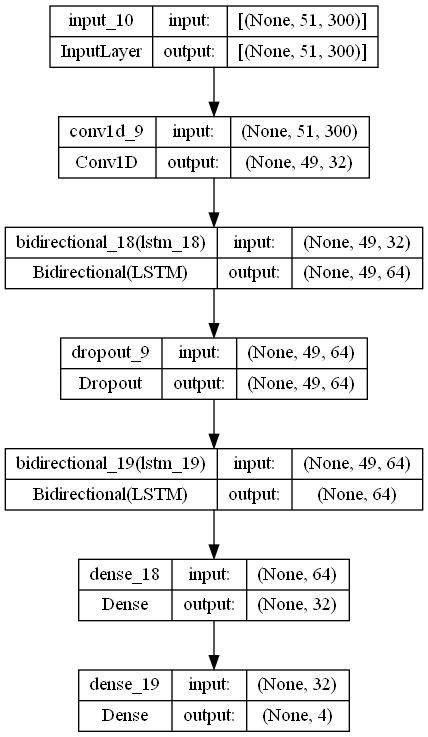

In [1005]:
model_pizza.plot_model('model_pizza.png')

In [1006]:
print("X_train shape:", tensor_X_pizza_train.shape)
print("y_train shape:", tensor_y_pizza_train.shape)

X_train shape: (153, 51, 300)
y_train shape: (153, 4)


In [1007]:
model_pizza.train((tensor_X_pizza_train, tensor_y_pizza_train), epochs=15, batch_size=4)

Epoch 1/15
39/39 [==============================] - 37s 69ms/step - loss: 1.4037 - accuracy: 0.2484
Epoch 2/15
39/39 [==============================] - 3s 65ms/step - loss: 1.3811 - accuracy: 0.2810
Epoch 3/15
39/39 [==============================] - 2s 62ms/step - loss: 1.3050 - accuracy: 0.5229
Epoch 4/15
39/39 [==============================] - 1s 36ms/step - loss: 1.1137 - accuracy: 0.5425
Epoch 5/15
39/39 [==============================] - 1s 35ms/step - loss: 0.8095 - accuracy: 0.7386
Epoch 6/15
39/39 [==============================] - 2s 42ms/step - loss: 0.9843 - accuracy: 0.6144
Epoch 7/15
39/39 [==============================] - 2s 43ms/step - loss: 0.5842 - accuracy: 0.8170
Epoch 8/15
39/39 [==============================] - 2s 43ms/step - loss: 0.4235 - accuracy: 0.8824
Epoch 9/15
39/39 [==============================] - 2s 44ms/step - loss: 0.3002 - accuracy: 0.8954
Epoch 10/15
39/39 [==============================] - 1s 38ms/step - loss: 0.2239 - accuracy: 0.9412
Epoch 11

In [1008]:
model_pizza.save_weights('model_pizza_weights.h5')

In [1009]:
pred = model_pizza.predict(tensor_X_pizza_test)

2/2 [==============================] - 6s 23ms/step


              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.86      0.67      0.75         9
           2       0.75      0.50      0.60        12
           3       0.64      1.00      0.78         9

    accuracy                           0.72        39
   macro avg       0.74      0.74      0.72        39
weighted avg       0.74      0.72      0.71        39



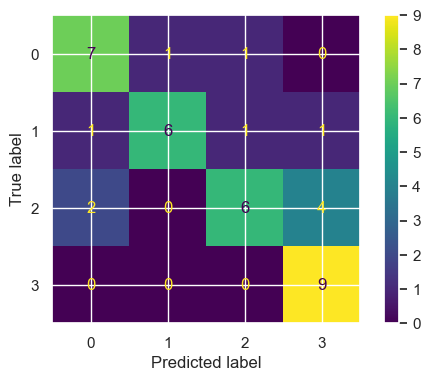

In [1010]:
model_pizza.plot_result(np.argmax(tensor_y_pizza_test, axis=1), pred)

In [1011]:
model_noodle = MainclassPrediction(51, 300)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 51, 300)]         0         
                                                                 
 conv1d_10 (Conv1D)          (None, 49, 32)            28832     
                                                                 
 bidirectional_20 (Bidirecti  (None, 49, 64)           16640     
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 49, 64)            0         
                                                                 
 bidirectional_21 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 32)                208

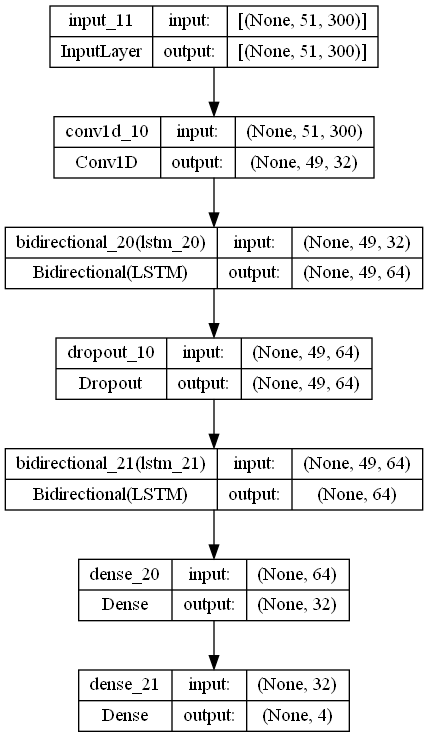

In [1012]:
model_noodle.plot_model('model_noodle.png')

In [1013]:
print("X_train shape:", tensor_X_noodle_train.shape)
print("y_train shape:", tensor_y_noodle_train.shape)

X_train shape: (153, 51, 300)
y_train shape: (153, 4)


In [1014]:
model_noodle.train((tensor_X_noodle_train, tensor_y_noodle_train), epochs=15, batch_size=4)

Epoch 1/15
39/39 [==============================] - 35s 76ms/step - loss: 1.3926 - accuracy: 0.2288
Epoch 2/15
39/39 [==============================] - 3s 77ms/step - loss: 1.3654 - accuracy: 0.3203
Epoch 3/15
39/39 [==============================] - 3s 79ms/step - loss: 1.2681 - accuracy: 0.3987
Epoch 4/15
39/39 [==============================] - 3s 81ms/step - loss: 0.9628 - accuracy: 0.6078
Epoch 5/15
39/39 [==============================] - 2s 44ms/step - loss: 0.7525 - accuracy: 0.6471
Epoch 6/15
39/39 [==============================] - 2s 41ms/step - loss: 0.7849 - accuracy: 0.6536
Epoch 7/15
39/39 [==============================] - 1s 37ms/step - loss: 0.7905 - accuracy: 0.6471
Epoch 8/15
39/39 [==============================] - 1s 37ms/step - loss: 0.5221 - accuracy: 0.7778
Epoch 9/15
39/39 [==============================] - 2s 43ms/step - loss: 0.4005 - accuracy: 0.8301
Epoch 10/15
39/39 [==============================] - 2s 43ms/step - loss: 0.3562 - accuracy: 0.8170
Epoch 11

In [1015]:
model_noodle.save_weights('model_noodle_weights.h5')

In [1016]:
pred = model_noodle.predict(tensor_X_noodle_test)

2/2 [==============================] - 6s 20ms/step


              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       1.00      0.22      0.36         9
           2       0.42      0.92      0.58        12
           3       0.80      0.44      0.57         9

    accuracy                           0.51        39
   macro avg       0.68      0.48      0.48        39
weighted avg       0.66      0.51      0.49        39



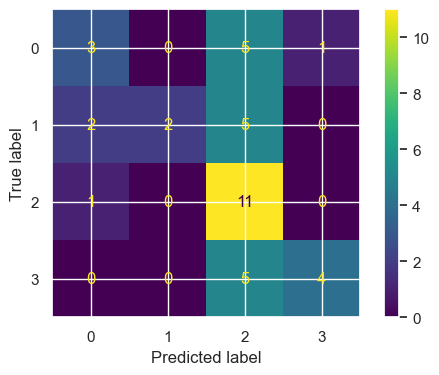

In [1017]:
model_noodle.plot_result(np.argmax(tensor_y_noodle_test, axis=1), pred)

In [1018]:
model_spaghetti = MainclassPrediction(51, 300)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 51, 300)]         0         
                                                                 
 conv1d_11 (Conv1D)          (None, 49, 32)            28832     
                                                                 
 bidirectional_22 (Bidirecti  (None, 49, 64)           16640     
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 49, 64)            0         
                                                                 
 bidirectional_23 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 32)                208

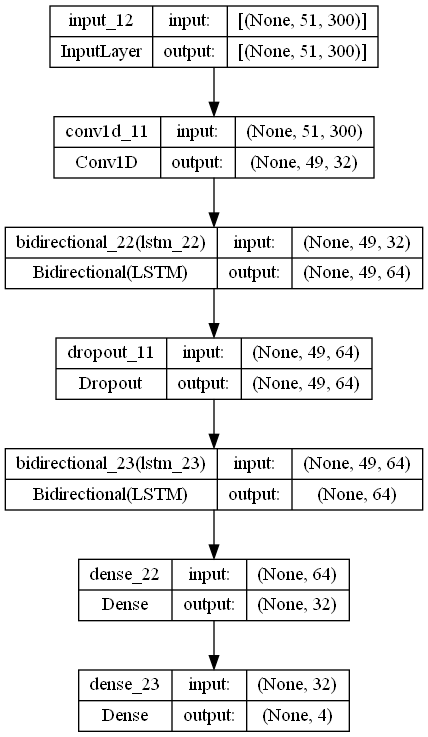

In [1019]:
model_spaghetti.plot_model('model_spaghetti.png')

In [1020]:
print("X_train shape:", tensor_X_spaghetti_train.shape)
print("y_train shape:", tensor_y_spaghetti_train.shape)

X_train shape: (153, 51, 300)
y_train shape: (153, 4)


In [1021]:
model_spaghetti.train((tensor_X_spaghetti_train, tensor_y_spaghetti_train), epochs=15, batch_size=4)

Epoch 1/15
39/39 [==============================] - 33s 71ms/step - loss: 1.3904 - accuracy: 0.2549
Epoch 2/15
39/39 [==============================] - 3s 73ms/step - loss: 1.3499 - accuracy: 0.4183
Epoch 3/15
39/39 [==============================] - 3s 79ms/step - loss: 1.1930 - accuracy: 0.5294
Epoch 4/15
39/39 [==============================] - 3s 76ms/step - loss: 1.0025 - accuracy: 0.5948
Epoch 5/15
39/39 [==============================] - 3s 66ms/step - loss: 0.7558 - accuracy: 0.7320
Epoch 6/15
39/39 [==============================] - 3s 66ms/step - loss: 0.6940 - accuracy: 0.7386
Epoch 7/15
39/39 [==============================] - 3s 65ms/step - loss: 0.2991 - accuracy: 0.9346
Epoch 8/15
39/39 [==============================] - 2s 46ms/step - loss: 0.2655 - accuracy: 0.9412
Epoch 9/15
39/39 [==============================] - 1s 36ms/step - loss: 0.1455 - accuracy: 0.9608
Epoch 10/15
39/39 [==============================] - 2s 40ms/step - loss: 0.0785 - accuracy: 0.9739
Epoch 11

In [1022]:
model_spaghetti.save_weights('model_spaghetti_weights.h5')

In [1023]:
pred = model_spaghetti.predict(tensor_X_spaghetti_test)

2/2 [==============================] - 5s 20ms/step


              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           1       0.55      0.67      0.60         9
           2       0.80      0.33      0.47        12
           3       0.75      0.67      0.71         9

    accuracy                           0.59        39
   macro avg       0.64      0.61      0.59        39
weighted avg       0.65      0.59      0.58        39



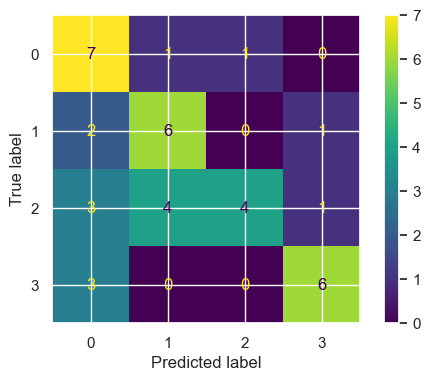

In [1024]:
model_spaghetti.plot_result(np.argmax(tensor_y_spaghetti_test, axis=1), pred)